# The Friendship Paradox: "Your Friends Have More Friends Than You Do"

## Introduction

The friendship paradox is a social network phenomenon first observed by sociologist Scott L. Feld in 1991. It states that **on average, most people have fewer friends than their friends have**. While this may seem counterintuitive, it's a mathematical reality that emerges from the structure of social networks.

### Why is it a paradox?

It seems impossible that most people could have fewer friends than their friends do. If everyone has fewer friends than average, then who has more? The resolution lies in understanding sampling bias: people with many connections are overrepresented in the friendship lists of others.

### Mathematical Explanation

The friendship paradox can be explained mathematically:

1. When you select a random person from a network, they have (on average) the mean degree of the network.
2. When you select a random friendship and then select one of the people in that friendship, you're more likely to select someone with many friends (as they appear in more friendships).

Formally, if we denote the average degree of the network as $\langle k \rangle$ and the average degree of neighbors as $\langle k_{nn} \rangle$, then the friendship paradox states that:

$\langle k_{nn} \rangle \geq \langle k \rangle$

The equality holds only in regular networks where everyone has exactly the same number of friends.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('ggplot')

## Measuring the Friendship Paradox

To quantify the friendship paradox in a network, we can calculate several metrics:

1. **Average Degree**: The average number of connections per node
2. **Average Neighbor Degree**: The average degree of neighboring nodes
3. **Paradox Ratio**: The ratio of average neighbor degree to average degree (values > 1 indicate paradox)
4. **Paradox Percentage**: Percentage of nodes whose average neighbor degree exceeds their own degree

Let's implement a function to calculate these metrics:

In [2]:
def calculate_friendship_paradox_metrics(G):
    """Calculate various metrics related to the friendship paradox.
    
    Args:
        G: A NetworkX graph
        
    Returns:
        dict: Dictionary containing calculated metrics
    """
    # Get all node degrees
    degrees = dict(G.degree())
    avg_degree = sum(degrees.values()) / len(degrees)
    
    # Calculate average neighbor degree for each node
    neighbor_degrees = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:  # Check if node has any neighbors
            neighbor_degrees[node] = sum(degrees[neighbor] for neighbor in neighbors) / len(neighbors)
        else:
            neighbor_degrees[node] = 0
    
    # Calculate average of average neighbor degrees
    avg_neighbor_degree = sum(neighbor_degrees.values()) / len(neighbor_degrees)
    
    # Calculate paradox ratio
    paradox_ratio = avg_neighbor_degree / avg_degree if avg_degree > 0 else 0
    
    # Calculate percentage of nodes experiencing the paradox
    paradox_count = sum(1 for node in G.nodes() if neighbor_degrees[node] > degrees[node])
    paradox_percentage = (paradox_count / len(G)) * 100
    
    return {
        'avg_degree': avg_degree,
        'avg_neighbor_degree': avg_neighbor_degree,
        'paradox_ratio': paradox_ratio,
        'paradox_percentage': paradox_percentage,
        'node_degrees': degrees,
        'neighbor_degrees': neighbor_degrees
    }

In [3]:
def analyze_and_visualize_network(G, network_type, seed=42):
    """
    Analyze and visualize a network to demonstrate the friendship paradox.
    
    Args:
        G: NetworkX graph
        network_type: String describing the type of network
        seed: Random seed for layout reproducibility
    
    Returns:
        dict: Calculated friendship paradox metrics
    """
    # Calculate metrics
    metrics = calculate_friendship_paradox_metrics(G)
    
    # Print analysis results
    print(f"{network_type} Analysis Results:")
    print(f"Average degree: {metrics['avg_degree']:.2f}")
    print(f"Average neighbor degree: {metrics['avg_neighbor_degree']:.2f}")
    print(f"Paradox ratio: {metrics['paradox_ratio']:.2f}")
    print(f"Percentage of users experiencing the paradox: {metrics['paradox_percentage']:.1f}%")
    
    # Create a figure and axes explicitly
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=seed)
    
    # Set node colors and increase node sizes for label visibility
    node_colors = [metrics['node_degrees'][node] for node in G.nodes()]
    node_sizes = [300 + 50 * metrics['node_degrees'][node] for node in G.nodes()]
    
    # Draw nodes with specified colors and sizes
    nx.draw_networkx_nodes(
        G, pos, 
        node_color=node_colors, 
        node_size=node_sizes, 
        cmap=plt.cm.viridis, 
        ax=ax
    )
    
    # Draw edges
    nx.draw_networkx_edges(
        G, pos, 
        edge_color='gray', 
        alpha=0.8, 
        width=0.5, 
        ax=ax
    )
    
    # Draw node labels with contrasting color and larger font
    nx.draw_networkx_labels(
        G, pos, 
        font_color='white', 
        font_size=10, 
        ax=ax
    )
    
    # Create and add a colorbar for the nodes
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Node Degree')
    
    # Add title based on network type
    if "Regular" in network_type:
        title = f"{network_type}: No Friendship Paradox"
    elif "Scale-Free" in network_type:
        title = f"{network_type}: Strong Friendship Paradox"
    else:
        title = f"{network_type}: Moderate Friendship Paradox"
    
    ax.set_title(title)
    ax.axis('off')
    plt.show()
    
    return metrics

## Case 1: Regular Networks - When the Paradox Disappears

In a regular network, every node has exactly the same degree. This is a special case where the friendship paradox does not occur, as everyone has the same number of friends.

Regular Graph (k=4) Analysis Results:
Average degree: 4.00
Average neighbor degree: 4.00
Paradox ratio: 1.00
Percentage of users experiencing the paradox: 0.0%


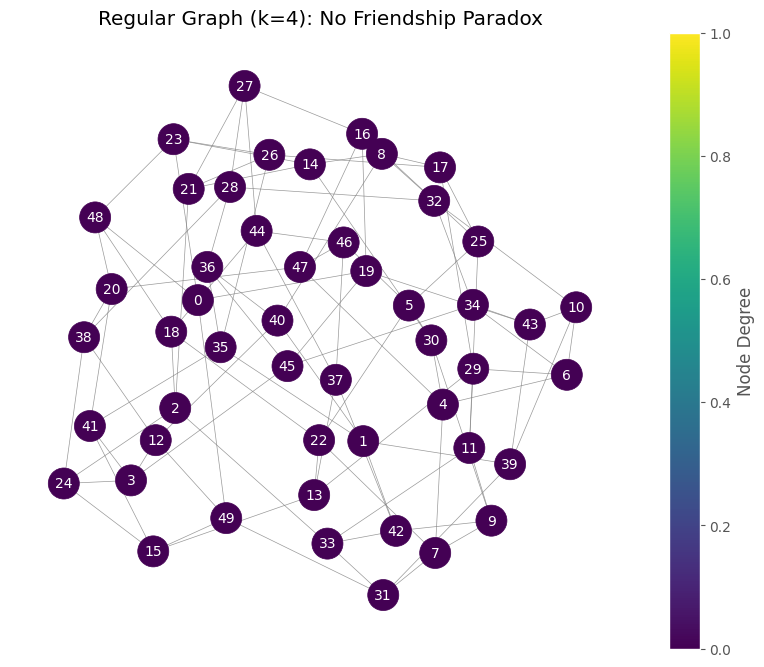

In [4]:
# Create a regular network where each node has exactly the same degree
k = 4  # Each node will have exactly 4 neighbors
n = 50  # 50 nodes
G_regular = nx.random_regular_graph(k, n)

# Analyze and visualize the regular network
regular_metrics = analyze_and_visualize_network(G_regular, f"Regular Graph (k={k})")

## Case 2: Scale-Free Networks - The Paradox in Action

Scale-free networks have a degree distribution following a power law, meaning there are a few highly connected nodes (hubs) and many nodes with few connections. This structure amplifies the friendship paradox.

Scale-Free Network Analysis Results:
Average degree: 3.84
Average neighbor degree: 6.90
Paradox ratio: 1.80
Percentage of users experiencing the paradox: 80.0%


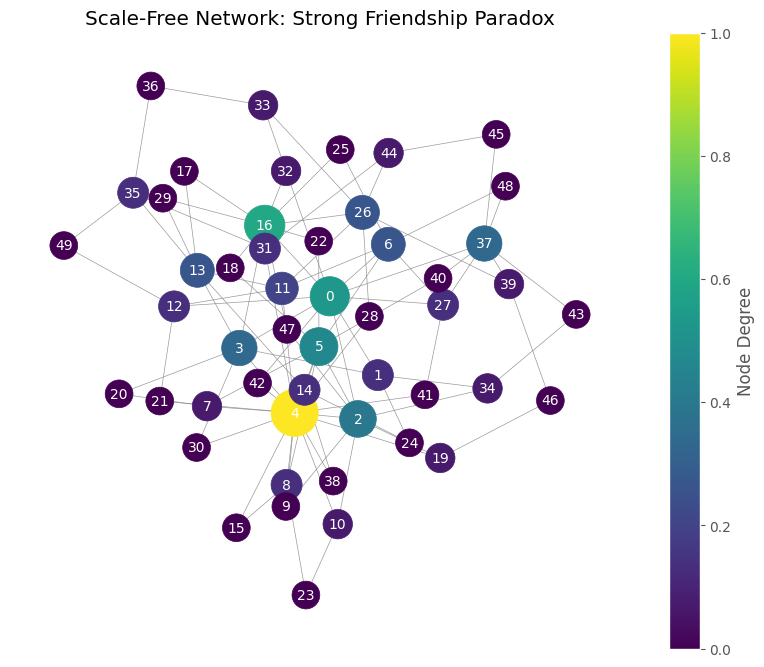

In [5]:
# Create a scale-free network
G_scale_free = nx.barabasi_albert_graph(n=50, m=2)  # m=2 means each new node forms 2 connections

# Analyze and visualize the scale-free network
scale_free_metrics = analyze_and_visualize_network(G_scale_free, "Scale-Free Network")

## Case 3: Random Networks (Erdős–Rényi)

Random networks have a Poisson degree distribution, which also leads to the friendship paradox, but typically less pronounced than in scale-free networks.

Random Network Analysis Results:
Average degree: 4.72
Average neighbor degree: 5.69
Paradox ratio: 1.21
Percentage of users experiencing the paradox: 64.0%


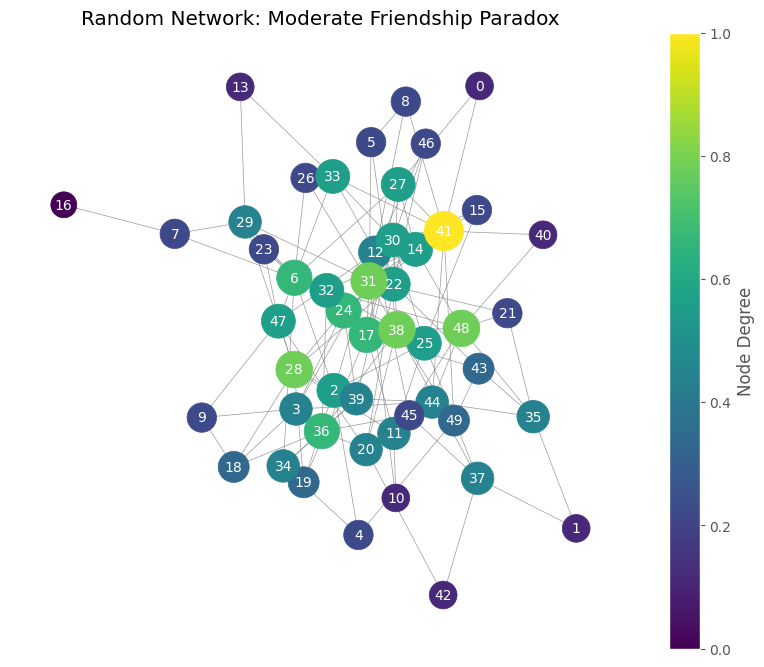

In [6]:
# Create a random network
G_random = nx.erdos_renyi_graph(n=50, p=0.1)  # p=0.1 is the probability of edge creation

# Analyze and visualize the random network
random_metrics = analyze_and_visualize_network(G_random, "Random Network")

## Comparative Analysis

Let's compare the three network types and visualize how the strength of the paradox differs between them.

,Network Type,Average Degree,Average Neighbor Degree,Paradox Ratio,Paradox Percentage
0,Regular,4.00,4.000000,1.000000,0.0
1,Scale-Free,3.84,6.896471,1.795956,80.0
2,Random,4.72,5.688333,1.205155,64.0


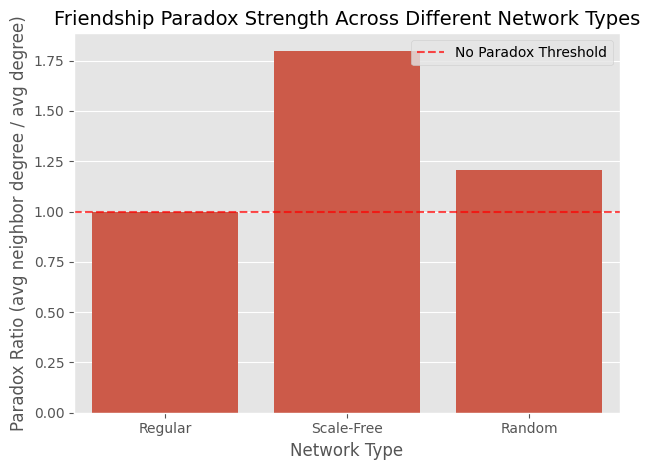

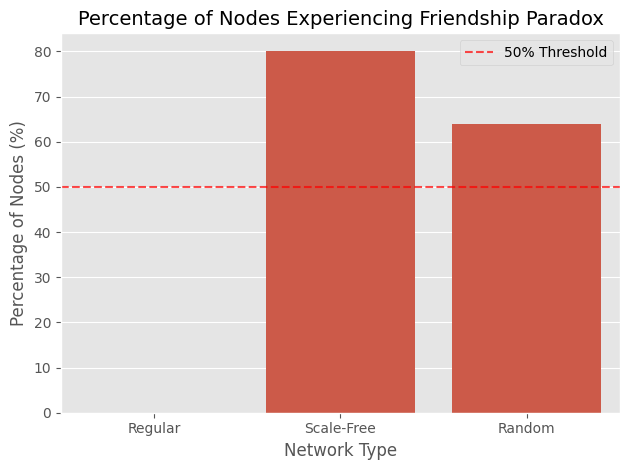

In [7]:
# Create a dataframe for comparison
comparison_data = {
    'Network Type': ['Regular', 'Scale-Free', 'Random'],
    'Average Degree': [
        regular_metrics['avg_degree'],
        scale_free_metrics['avg_degree'],
        random_metrics['avg_degree']
    ],
    'Average Neighbor Degree': [
        regular_metrics['avg_neighbor_degree'],
        scale_free_metrics['avg_neighbor_degree'],
        random_metrics['avg_neighbor_degree']
    ],
    'Paradox Ratio': [
        regular_metrics['paradox_ratio'],
        scale_free_metrics['paradox_ratio'],
        random_metrics['paradox_ratio']
    ],
    'Paradox Percentage': [
        regular_metrics['paradox_percentage'],
        scale_free_metrics['paradox_percentage'],
        random_metrics['paradox_percentage']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

# Create a bar chart comparing paradox ratios
plt.figure()
sns.barplot(x='Network Type', y='Paradox Ratio', data=comparison_df)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No Paradox Threshold')
plt.title('Friendship Paradox Strength Across Different Network Types', fontsize=14)
plt.ylabel('Paradox Ratio (avg neighbor degree / avg degree)')
plt.tight_layout()
plt.legend()
plt.show()

# Create a bar chart comparing paradox percentages
plt.figure()
sns.barplot(x='Network Type', y='Paradox Percentage', data=comparison_df)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% Threshold')
plt.title('Percentage of Nodes Experiencing Friendship Paradox', fontsize=14)
plt.ylabel('Percentage of Nodes (%)')
plt.legend()
plt.tight_layout()
plt.show()

## Distribution Analysis: Individual Experiences of the Paradox

Let's examine how individual nodes experience the friendship paradox by plotting the distribution of node degrees vs. their neighbors' average degrees.

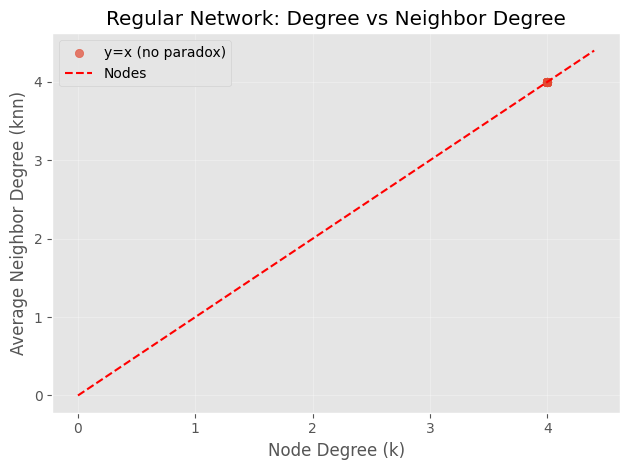

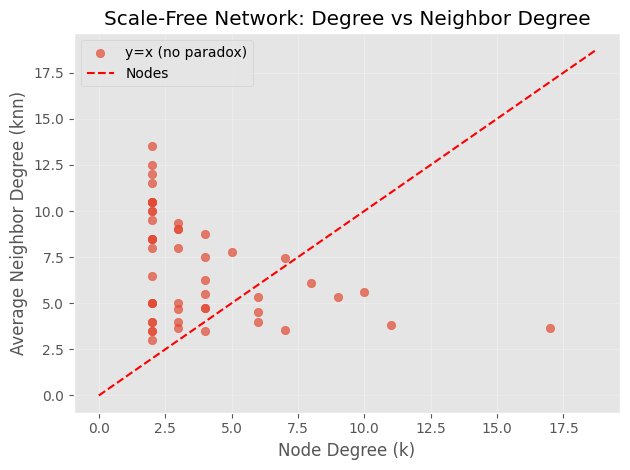

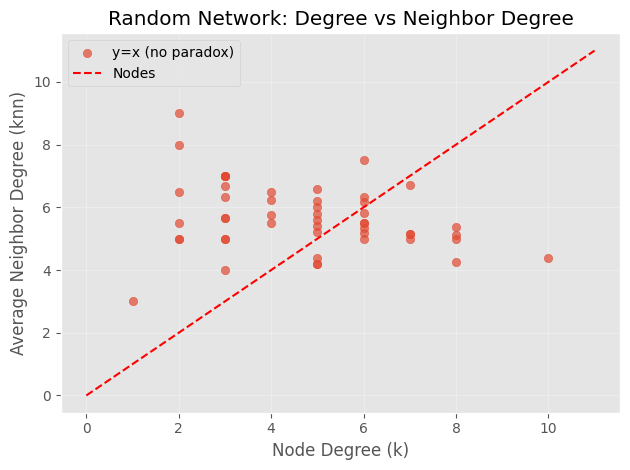

In [8]:
def plot_degree_vs_neighbor_degree(G, metrics, title):
    """Plot node degrees against their neighbors' average degrees."""
    node_degrees = []
    neighbor_avg_degrees = []
    
    for node in G.nodes():
        node_degrees.append(metrics['node_degrees'][node])
        neighbor_avg_degrees.append(metrics['neighbor_degrees'][node])
    
    plt.figure()
    plt.scatter(node_degrees, neighbor_avg_degrees, alpha=0.7)
    
    # Add y=x line
    max_val = max(max(node_degrees), max(neighbor_avg_degrees)) * 1.1
    plt.plot([0, max_val], [0, max_val], 'r--', label='y=x')
    
    plt.xlabel('Node Degree (k)')
    plt.ylabel('Average Neighbor Degree (knn)')
    plt.title(title)
    plt.legend(['y=x (no paradox)', 'Nodes'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot for all three networks
plot_degree_vs_neighbor_degree(G_regular, regular_metrics, 'Regular Network: Degree vs Neighbor Degree')
plot_degree_vs_neighbor_degree(G_scale_free, scale_free_metrics, 'Scale-Free Network: Degree vs Neighbor Degree')
plot_degree_vs_neighbor_degree(G_random, random_metrics, 'Random Network: Degree vs Neighbor Degree')

# Mathematical Proof of the Friendship Paradox

In many real-world networks, **your friends tend to have more friends than you do**. This counterintuitive phenomenon is known as the **friendship paradox**. Below, we provide a step-by-step proof of this paradox with detailed explanations.


## 1. Average Degree of the Network

Suppose our network (or graph) has $n$ nodes. Let each node $ i$ have a degree $ k_i$, which represents the number of connections (or friends) that node has.

The **average degree** of the network, denoted by $ \langle k \rangle$, is given by:

$$
\langle k \rangle = \frac{1}{n} \sum_{i=1}^{n} k_i.
$$

**Explanation:**  
- **Sum of degrees:** Add up the degrees of all nodes in the network.
- **Average:** Divide this sum by the total number of nodes $ n$ to get the average number of connections per node.


## 2. Average Neighbor Degree from a Node's Perspective

For a given node $ i$, we can compute the average degree of its neighbors. Let $ N(i)$ denote the set of neighbors of node $ i$. The average degree of the neighbors of node $ i$ is:

$$
\text{Average neighbor degree for node } i = \frac{1}{k_i} \sum_{j \in N(i)} k_j.
$$

Then, to find the overall average neighbor degree (averaged over all nodes), we write:

$$
\langle k_{nn} \rangle = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{1}{k_i} \sum_{j \in N(i)} k_j \right).
$$

**Explanation:**  
- For each node $ i$, sum the degrees $ k_j$ of its neighbors $ j$ (i.e., $ j \in N(i)$).
- Divide by $ k_i$ (the number of neighbors) to get the average for node $ i$.
- Finally, take the average over all nodes by dividing the sum of these averages by $ n$.


## 3. The Edge Perspective: A Weighted Average

The above approach gives an unweighted average of neighbor degrees. However, the friendship paradox is best understood from the perspective of following a random edge. Nodes with higher degrees are more likely to be reached when you randomly choose an edge because they appear in more edges.

### 3.1 Probability of Reaching a Node by Following an Edge

When choosing an edge at random, the probability $ P(i)$ that the edge leads to node $ i$ is proportional to its degree $ k_i$:

$$
P(i) = \frac{k_i}{\sum_{j=1}^{n} k_j}.
$$

**Explanation:**  
- A node with a higher degree $ k_i$ is connected to more edges.
- Therefore, it has a higher chance of being selected when you pick a random edge.

### 3.2 Expected Degree of a Node Reached via a Random Edge

Now, if you follow a random edge and land at node $ i$, the degree of that node is $ k_i$. The **expected degree** of a node reached this way (which is the average degree of a friend) is given by:

$$
\langle k_{\text{friend}} \rangle = \sum_{i=1}^{n} P(i) \cdot k_i.
$$

Substituting the probability $ P(i)$:

$$
\langle k_{\text{friend}} \rangle = \sum_{i=1}^{n} \frac{k_i}{\sum_{j=1}^{n} k_j} \cdot k_i = \frac{\sum_{i=1}^{n} k_i^2}{\sum_{i=1}^{n} k_j}.
$$

**Explanation:**  
- Each node’s degree $ k_i$ is weighted by its likelihood $ \frac{k_i}{\text{total degree}}$ of being reached.
- This weighted average emphasizes nodes with higher degrees since they contribute more to the sum in the numerator.

Thus, from the edge perspective, the average neighbor degree becomes:

$$
\langle k_{nn} \rangle = \frac{\sum_{i=1}^{n} k_i^2}{\sum_{i=1}^{n} k_i}.
$$


## 4. Comparing the Two Averages Using the Cauchy-Schwarz Inequality

The Cauchy-Schwarz inequality tells us that for any real numbers $ k_i$:

$$
\left( \sum_{i=1}^{n} k_i \right)^2 \leq n \cdot \sum_{i=1}^{n} k_i^2.
$$

Rearrange the inequality:

$$
\frac{\sum_{i=1}^{n} k_i^2}{\sum_{i=1}^{n} k_i} \geq \frac{\sum_{i=1}^{n} k_i}{n} = \langle k \rangle.
$$

**Explanation:**  
- The left-hand side of the inequality is the average neighbor degree from the edge perspective.
- The right-hand side is the simple average degree.
- This inequality shows that the weighted average (which accounts for the fact that high-degree nodes are more likely to be reached) is always greater than or equal to the simple average degree.

**Note:**  
- **Equality holds only** if every node has the same degree (i.e., in a regular graph).  
- In most networks, degrees vary, so the inequality is strict.

## Real-World Applications of the Friendship Paradox

The friendship paradox has several practical applications:

1. **Early Detection of Disease Outbreaks**: By monitoring friends of randomly selected individuals, public health officials can detect outbreaks earlier.

2. **Efficient Information Diffusion**: Messages spread faster when initially given to random neighbors rather than random individuals.

3. **Social Network Analysis**: Understanding influence and centrality in networks.

4. **Marketing**: Identifying influential individuals for targeted campaigns.

Let's simulate a simple information diffusion scenario:

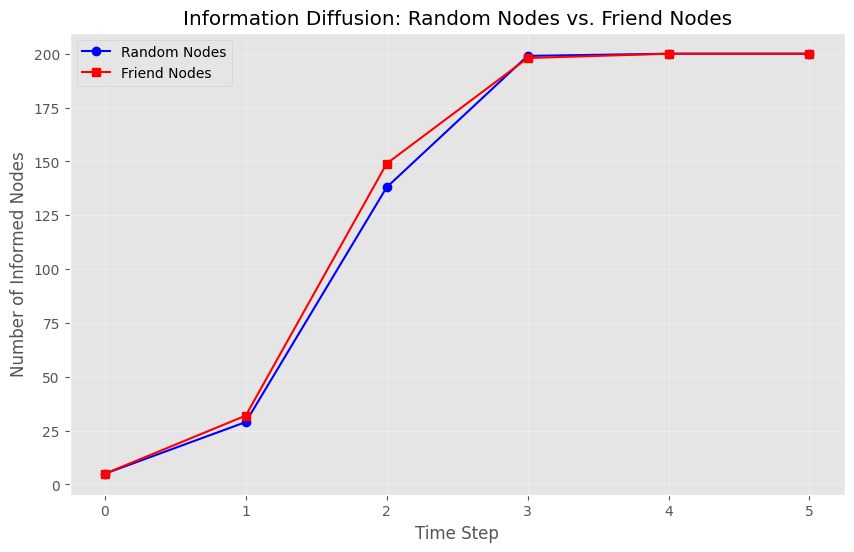

In [9]:
def simulate_information_diffusion(G, initial_nodes, steps=5):
    """Simulate information spreading through a network.
    
    Args:
        G: NetworkX graph
        initial_nodes: List of nodes that start with the information
        steps: Number of time steps to simulate
        
    Returns:
        list: Number of informed nodes at each time step
    """
    informed = set(initial_nodes)
    informed_count = [len(informed)]
    
    for _ in range(steps):
        # Find all neighbors of informed nodes
        new_informed = set()
        for node in informed:
            neighbors = set(G.neighbors(node))
            new_informed.update(neighbors)
        
        # Update the informed set
        informed.update(new_informed)
        informed_count.append(len(informed))
    
    return informed_count

# Create a larger scale-free network for this demo
G_large = nx.barabasi_albert_graph(n=200, m=3)

# Strategy 1: Select 5 random nodes
np.random.seed(42)  # For reproducibility
random_nodes = np.random.choice(list(G_large.nodes()), size=5, replace=False)

# Strategy 2: Select 5 random nodes and then pick one random friend of each
friend_nodes = []
for _ in range(5):
    random_node = np.random.choice(list(G_large.nodes()))
    neighbors = list(G_large.neighbors(random_node))
    if neighbors:  # Make sure the node has neighbors
        friend_nodes.append(np.random.choice(neighbors))
    else:
        friend_nodes.append(random_node)  # Fallback to the node itself

# Run simulations
random_diffusion = simulate_information_diffusion(G_large, random_nodes)
friend_diffusion = simulate_information_diffusion(G_large, friend_nodes)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(len(random_diffusion)), random_diffusion, 'b-o', label='Random Nodes')
plt.plot(range(len(friend_diffusion)), friend_diffusion, 'r-s', label='Friend Nodes')
plt.xlabel('Time Step')
plt.ylabel('Number of Informed Nodes')
plt.title('Information Diffusion: Random Nodes vs. Friend Nodes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Consequences and Psychological Impact

The friendship paradox can have real psychological effects on people in social networks:

1. **Social Comparison**: People may feel inadequate when comparing themselves to their seemingly more popular friends.

2. **FOMO (Fear of Missing Out)**: Seeing friends with more connections can lead to anxiety about missing social opportunities.

3. **Social Media Effects**: The paradox is amplified on platforms like Facebook, Instagram, and Twitter.

4. **Perception Bias**: People might think they're less popular than they actually are relative to the overall network.

## Generalizations of the Friendship Paradox

The paradox extends beyond just counting friends:

1. **Generalized Friendship Paradox**: Your friends are not only more popular but also richer, happier, etc. (any trait that correlates with popularity).

2. **Activity Paradox**: Your friends are more active on social media than you are.

3. **Multi-trait Paradox**: The paradox can apply to multiple attributes simultaneously.

## Conclusion

The friendship paradox is a robust mathematical property of networks with heterogeneous degree distributions. Our analysis has shown:

1. In regular networks, the paradox disappears as all nodes have identical degrees.
2. Scale-free networks exhibit the strongest paradox effect due to their hub structure.
3. Random networks show a moderate paradox effect.

Understanding this phenomenon is crucial for accurately interpreting social network structures and designing efficient network interventions for information dissemination or epidemic control.